In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv(r'C:\Users\vss\Desktop\ED-02-Mar-2023.csv')

In [3]:
df.head()

,INSTRUMENT TYPE \n,SYMBOL \n,EXPIRY DATE \n,OPTION TYPE \n,STRIKE PRICE \n,LTP \n,%CHNG \n,VOLUME \n(Contracts),VALUE* \n(₹ Lakhs),OPEN INTEREST \n(Contracts),VALUE OF UNDERLYING \n
0,Index Options,BANKNIFTY,2-Mar-23,Put,40400,10.05,-77.21,23703305,136353,205834,40390
1,Index Options,BANKNIFTY,2-Mar-23,Put,40500,110.15,68.81,19885926,322202,91628,40390
2,Index Options,BANKNIFTY,2-Mar-23,Call,40500,0.05,-99.98,17691360,299780,201929,40390
3,Index Options,NIFTY,2-Mar-23,Put,17300,0.05,-99.33,16793378,62807,232783,17322
4,Index Options,BANKNIFTY,2-Mar-23,Call,40600,0.10,-99.95,16065770,233636,137333,40390


In [4]:
df.columns

Index(['INSTRUMENT TYPE \n', 'SYMBOL \n', 'EXPIRY DATE \n', 'OPTION TYPE \n',
       'STRIKE PRICE \n', 'LTP \n', '%CHNG \n', 'VOLUME \n(Contracts)',
       'VALUE* \n(₹ Lakhs)', 'OPEN INTEREST \n(Contracts)',
       'VALUE OF UNDERLYING \n'],
      dtype='object')

In [5]:
df.columns = df.columns.str.split('\n').str[0]

In [6]:
df.columns

Index(['INSTRUMENT TYPE ', 'SYMBOL ', 'EXPIRY DATE ', 'OPTION TYPE ',
       'STRIKE PRICE ', 'LTP ', '%CHNG ', 'VOLUME ', 'VALUE* ',
       'OPEN INTEREST ', 'VALUE OF UNDERLYING '],
      dtype='object')

In [7]:
df.head()

,INSTRUMENT TYPE,SYMBOL,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING
0,Index Options,BANKNIFTY,2-Mar-23,Put,40400,10.05,-77.21,23703305,136353,205834,40390
1,Index Options,BANKNIFTY,2-Mar-23,Put,40500,110.15,68.81,19885926,322202,91628,40390
2,Index Options,BANKNIFTY,2-Mar-23,Call,40500,0.05,-99.98,17691360,299780,201929,40390
3,Index Options,NIFTY,2-Mar-23,Put,17300,0.05,-99.33,16793378,62807,232783,17322
4,Index Options,BANKNIFTY,2-Mar-23,Call,40600,0.10,-99.95,16065770,233636,137333,40390


In [8]:
df.describe()

,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING
count,20.000000,20.000000,20.000000,2.000000e+01,20.000000,20.000000,20.000000
mean,31285.000000,37.355000,-41.293000,1.221775e+07,142017.800000,125999.250000,31162.800000
std,11653.857505,83.135047,104.673144,4.851614e+06,114310.396729,62119.229144,11594.546348
min,17250.000000,0.050000,-99.990000,6.346721e+06,9415.000000,17307.000000,17322.000000
25%,17400.000000,0.050000,-99.942500,8.018044e+06,38868.750000,81094.750000,17322.000000
50%,40350.000000,0.050000,-99.740000,1.220174e+07,121455.000000,128473.000000,40390.000000
75%,40600.000000,14.550000,-40.705000,1.505757e+07,226318.250000,171199.000000,40390.000000
max,41000.000000,309.600000,223.650000,2.370330e+07,337288.000000,232783.000000,40390.000000


### OBSERVATION 

1. Average change is about -41.29 %.
2. Standard Deviation(How price spread throughout the day) of Last Traded Price is 83.13.

In [9]:
correlation = df.corr()

correlation

,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING
STRIKE PRICE,1.000000,0.244852,-0.067560,0.305222,0.414421,-0.090046,0.999885
LTP,0.244852,1.000000,0.735721,-0.056717,0.649413,-0.663853,0.242389
%CHNG,-0.067560,0.735721,1.000000,-0.028282,0.596248,-0.699127,-0.068861
VOLUME,0.305222,-0.056717,-0.028282,1.000000,0.474124,0.440465,0.309263
VALUE*,0.414421,0.649413,0.596248,0.474124,1.000000,-0.311128,0.414342
OPEN INTEREST,-0.090046,-0.663853,-0.699127,0.440465,-0.311128,1.000000,-0.088104
VALUE OF UNDERLYING,0.999885,0.242389,-0.068861,0.309263,0.414342,-0.088104,1.000000


<AxesSubplot:>

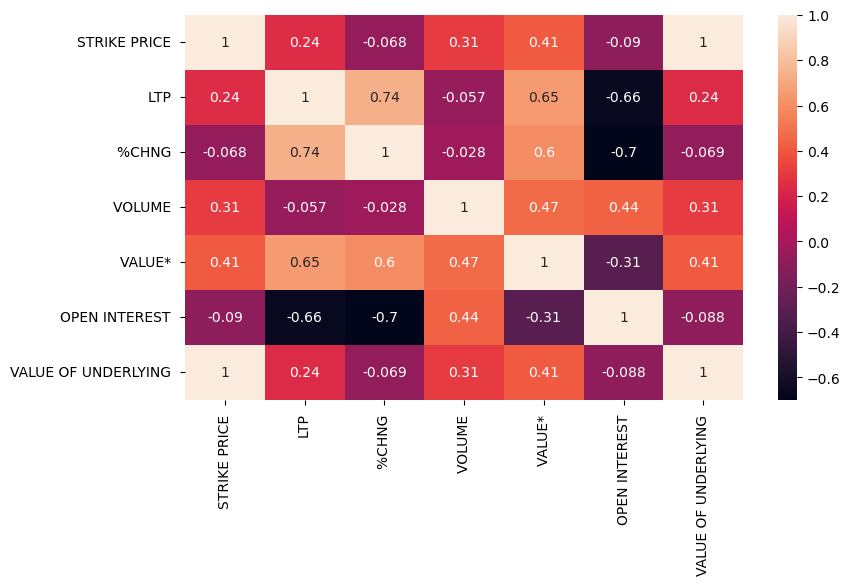

In [10]:
plt.figure(figsize=(9,5))
sns.heatmap(correlation,annot=True)

#CORREALATION

1.LTP & %CHNG is highly correlated i.e. 0.74

2.volume & open interest is normaly correlated i.e.0.44

In [11]:
df.isnull().sum()

INSTRUMENT TYPE         0
SYMBOL                  0
EXPIRY DATE             0
OPTION TYPE             0
STRIKE PRICE            0
LTP                     0
%CHNG                   0
VOLUME                  0
VALUE*                  0
OPEN INTEREST           0
VALUE OF UNDERLYING     0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INSTRUMENT TYPE       20 non-null     object 
 1   SYMBOL                20 non-null     object 
 2   EXPIRY DATE           20 non-null     object 
 3   OPTION TYPE           20 non-null     object 
 4   STRIKE PRICE          20 non-null     int64  
 5   LTP                   20 non-null     float64
 6   %CHNG                 20 non-null     float64
 7   VOLUME                20 non-null     int64  
 8   VALUE*                20 non-null     int64  
 9   OPEN INTEREST         20 non-null     int64  
 10  VALUE OF UNDERLYING   20 non-null     int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.8+ KB


In [13]:
df.head(2)

,INSTRUMENT TYPE,SYMBOL,EXPIRY DATE,OPTION TYPE,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING
0,Index Options,BANKNIFTY,2-Mar-23,Put,40400,10.05,-77.21,23703305,136353,205834,40390
1,Index Options,BANKNIFTY,2-Mar-23,Put,40500,110.15,68.81,19885926,322202,91628,40390


## Feature engineering

In [14]:
# convert Object datatypes into integer
df['OPEN INTEREST'] = df['OPEN INTEREST '].astype('int')

In [15]:
df['OPEN INTEREST '].unique()

array([205834,  91628, 201929, 232783, 137333, 119613, 188384,  24897,
       158276, 160053,  65240, 186088, 111367,  54942,  93935,  17307,
        72652, 166236,  83909, 147579], dtype=int64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INSTRUMENT TYPE       20 non-null     object 
 1   SYMBOL                20 non-null     object 
 2   EXPIRY DATE           20 non-null     object 
 3   OPTION TYPE           20 non-null     object 
 4   STRIKE PRICE          20 non-null     int64  
 5   LTP                   20 non-null     float64
 6   %CHNG                 20 non-null     float64
 7   VOLUME                20 non-null     int64  
 8   VALUE*                20 non-null     int64  
 9   OPEN INTEREST         20 non-null     int64  
 10  VALUE OF UNDERLYING   20 non-null     int64  
 11  OPEN INTEREST         20 non-null     int32  
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 1.9+ KB


In [18]:
df['EXPIRY DATE '].value_counts()

2-Mar-23    20
Name: EXPIRY DATE , dtype: int64

In [35]:
spilt = df['EXPIRY DATE '].str.split('-',expand=True)

spilt.head()

,0,1,2
0,2,Mar,23
1,2,Mar,23
2,2,Mar,23
3,2,Mar,23
4,2,Mar,23


In [36]:
df['Date'] = spilt[0]
df['Month'] = spilt[1]
df['Year'] = spilt[2]

In [50]:
df['Date'] = df['Date'].astype('int')

In [52]:
df['Year'] = df['Year'].astype('int')

In [54]:
df.drop(['Month'],axis=1,inplace=True)

In [55]:
df.head(2)

,INSTRUMENT TYPE,SYMBOL,OPTION TYPE,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING,OPEN INTEREST,Date,Year
0,Index Options,BANKNIFTY,Put,40400,10.05,-77.21,23703305,136353,205834,40390,205834,2,23
1,Index Options,BANKNIFTY,Put,40500,110.15,68.81,19885926,322202,91628,40390,91628,2,23


In [47]:
df.drop(['EXPIRY DATE '],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   INSTRUMENT TYPE       20 non-null     object 
 1   SYMBOL                20 non-null     object 
 2   OPTION TYPE           20 non-null     object 
 3   STRIKE PRICE          20 non-null     int64  
 4   LTP                   20 non-null     float64
 5   %CHNG                 20 non-null     float64
 6   VOLUME                20 non-null     int64  
 7   VALUE*                20 non-null     int64  
 8   OPEN INTEREST         20 non-null     int64  
 9   VALUE OF UNDERLYING   20 non-null     int64  
 10  OPEN INTEREST         20 non-null     int32  
 11  Date                  20 non-null     int32  
 12  Year                  20 non-null     int32  
dtypes: float64(2), int32(3), int64(5), object(3)
memory usage: 1.9+ KB


In [57]:
df.columns

Index(['INSTRUMENT TYPE ', 'SYMBOL ', 'OPTION TYPE ', 'STRIKE PRICE ', 'LTP ',
       '%CHNG ', 'VOLUME ', 'VALUE* ', 'OPEN INTEREST ',
       'VALUE OF UNDERLYING ', 'OPEN INTEREST', 'Date', 'Year'],
      dtype='object')

In [76]:
# Group-by function to check mean by option type 

df.groupby(['OPTION TYPE ','INSTRUMENT TYPE ']).mean()['VALUE* ']

OPTION TYPE   INSTRUMENT TYPE 
Call          Index Options       124608.8
Put           Index Options       159426.8
Name: VALUE* , dtype: float64

<AxesSubplot:ylabel='VALUE* '>

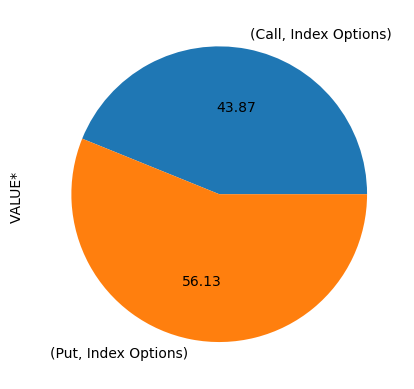

In [77]:
df.groupby(['OPTION TYPE ','INSTRUMENT TYPE ']).mean()['VALUE* '].plot(kind='pie',autopct='%.2f')

OBSERVATION

On 2nd March 43.87% is CALL index option & 56.13% is PUT index option. 

In [90]:
df.columns

Index(['INSTRUMENT TYPE ', 'SYMBOL ', 'OPTION TYPE ', 'STRIKE PRICE ', 'LTP ',
       '%CHNG ', 'VOLUME ', 'VALUE* ', 'OPEN INTEREST ',
       'VALUE OF UNDERLYING ', 'OPEN INTEREST', 'Date', 'Year'],
      dtype='object')

In [101]:
df.head(2)

,INSTRUMENT TYPE,SYMBOL,OPTION TYPE,STRIKE PRICE,LTP,%CHNG,VOLUME,VALUE*,OPEN INTEREST,VALUE OF UNDERLYING,OPEN INTEREST,Date,Year
0,Index Options,BANKNIFTY,Put,40400,10.05,-77.21,23703305,136353,205834,40390,205834,2,23
1,Index Options,BANKNIFTY,Put,40500,110.15,68.81,19885926,322202,91628,40390,91628,2,23


In [140]:
features = df[['OPTION TYPE ','VOLUME ','VALUE* ','OPEN INTEREST ','VALUE OF UNDERLYING ','OPEN INTEREST']]

In [141]:
target = df['STRIKE PRICE ']

In [142]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [139]:
df['OPTION TYPE '] = df['OPTION TYPE '].map({'Put': 0,'Call': 1})

In [143]:
features = scaler.fit_transform(features)

In [144]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(18, 6) (2, 6)


In [119]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 89.1/89.1 MB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [147]:
model = LogisticRegression(solver='liblinear',random_state=0)

In [148]:
model.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [149]:
from sklearn.metrics import classification_report,confusion_matrix

In [159]:
p_pred = model.predict_proba(X_train)
y_pred = model.predict(X_train)
print(p_pred)
print(y_pred)

[[0.03055323 0.03833532 0.06103754 0.06333987 0.0652826  0.05273067
  0.04643059 0.05388831 0.13492304 0.16187835 0.15781944 0.13378104]
 [0.1286381  0.07653252 0.16565965 0.16499883 0.08704308 0.04947141
  0.05464025 0.04459552 0.03282865 0.0530308  0.07694977 0.06561143]
 [0.06245566 0.10310746 0.14530857 0.15343957 0.09325358 0.13417223
  0.03969125 0.05198069 0.07093595 0.06229945 0.0427216  0.04063398]
 [0.06045193 0.10975653 0.14939829 0.14789846 0.09452741 0.1170307
  0.03491388 0.0506434  0.08259648 0.07061673 0.0455672  0.03659899]
 [0.07199637 0.02168069 0.05843426 0.07584752 0.0530587  0.0346169
  0.09756818 0.05332463 0.03878485 0.08952555 0.18253211 0.22263025]
 [0.06662939 0.24858436 0.12625367 0.11444812 0.02897654 0.0659897
  0.03511811 0.09215346 0.1213081  0.07516616 0.01652657 0.00884581]
 [0.03656453 0.05259526 0.06494017 0.07088651 0.02823422 0.0160188
  0.03605484 0.04972494 0.1199568  0.23623114 0.18434155 0.10445125]
 [0.08176757 0.10289732 0.04650478 0.03623342

In [152]:
score_ = model.score(X_train,Y_train)

score_

0.7777777777777778

In [154]:
conf_m = confusion_matrix(Y_train,y_pred)

conf_m

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2]], dtype=int64)

In [156]:
report = classification_report(Y_train,y_pred)

report

'              precision    recall  f1-score   support\n\n       17250       1.00      1.00      1.00         1\n       17300       1.00      1.00      1.00         1\n       17350       0.50      0.50      0.50         2\n       17400       0.50      0.50      0.50         2\n       17450       1.00      1.00      1.00         1\n       17500       1.00      1.00      1.00         1\n       40200       1.00      1.00      1.00         1\n       40300       1.00      1.00      1.00         1\n       40400       1.00      0.50      0.67         2\n       40500       0.50      1.00      0.67         2\n       40600       1.00      0.50      0.67         2\n       40700       1.00      1.00      1.00         2\n\n    accuracy                           0.78        18\n   macro avg       0.88      0.83      0.83        18\nweighted avg       0.83      0.78      0.78        18\n'

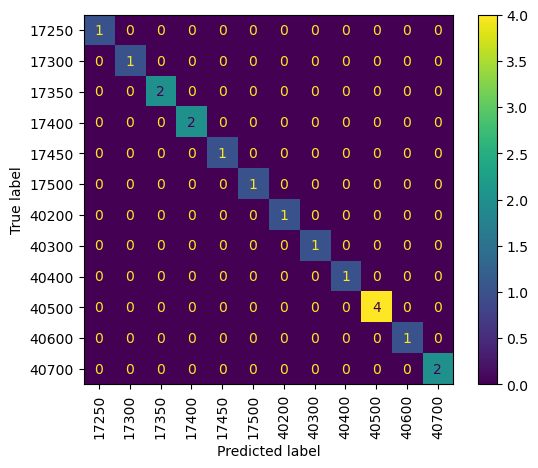

In [167]:
metrics.plot_confusion_matrix(model,X_train,y_pred)
plt.xticks(rotation=90)
plt.show()